# STOR 535: Lab2
### Submit the PDF version of this homework to gradescope by Feb 18

In [79]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Simply run the following python script to obtain ``data``.

In [80]:
np.random.seed(42) 
num_flips = 10000

data = np.random.choice([0,1], size=num_flips, p = [0.3, 0.7])

### 1. Explain in words what the meaning of the above python code? (10 points)

In [81]:
#sets the random seed to 42 for the pseudo-random generator. This ensures that numbers ran are reproducable.
np.random.seed(42) 

#this assigns an integer to the num_flips, representing how many flips we want in the simulation
num_flips = 10000

#np.random.choice is the function chosen to simulate a coin flip num_flips times with probabilities of .3 for 0 and .7 for 1.
#then the simulation is assigned to the variable data as a numpy array
data = np.random.choice([0,1], size=num_flips, p = [0.3, 0.7])

### 2. Given the vector `data`, print the first 10 elements. Then, explain the meaning of data in the context of flipping a coin. Specifically, describe what each element represents. (5 points)

In [82]:
print(data[:10])

[1 1 1 1 0 0 0 1 1 1]


### 3. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping a fair coin. You can assume that 1 represent head up and 0 represent tail up. Print the probability. (10 points)

Hint: The order of outcome matters.

In [83]:
probabilityfair = 1
flips = data[:10]
for i in flips:
    if(i == 1):
        probabilityfair *= .5
    else:
        probabilityfair *= .5

print(f'The outcome is {probabilityfair * 100} percent')

The outcome is 0.09765625 percent


### 4. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping an unfair coin with head up probability 0.7. Print the probability. (5 points)

Hint: The order of outcome matters.

In [84]:
probabilityunfair = 1
flips = data[:10]
for i in flips:
    if(i == 1):
        probabilityunfair *= .7
    else:
        probabilityunfair *= .3

print(f'The outcome is {probabilityunfair * 100} percent')

The outcome is 0.22235660999999984 percent


### 5. Suppoe that we have 9 coins in a box. Each coin appears identical, but the $i$th coin has probability of landing heads $p_i = 0.1 \times i$ for  $i = 1, 2, \ldots, 9$. We randomly draw one coin from the box (each coin equally likely), then flip it 10,000 times. Let the vector ``data`` in the above question be the outcome.

#### 5.1 Before we flip the coin, what is the prior probability of selecting each type of coin? Visualize this in a bar plot, where the y-axis represents the prior probability, and x-axis represents each type of coin. (10 points)

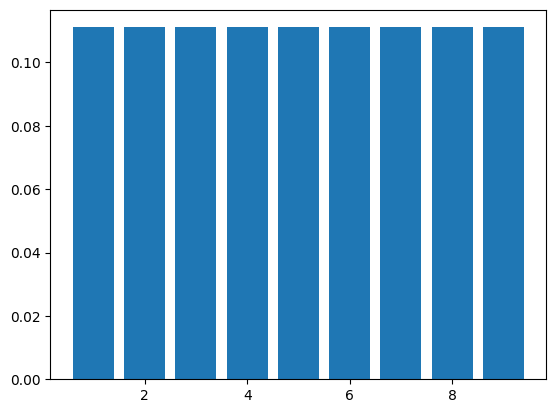

In [85]:
fig, ax = plt.subplots()
x = np.arange(1, 10)
coinprobabilities = [i*.1 for i in x]
y = [(1/9) for i in x]
ax.bar(x,y)
plt.show()

#### 5.2 After we observe the outcome of the first flip in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

In [86]:
#calculates the probability of the flip outcome given our coin
def calculate_head_prob(flips, headprobability):
    outprobability = 1
    for i in flips:
        if(i == 1):
            outprobability *= headprobability
        else:
            outprobability *= (1-headprobability)
    return outprobability

#calculates the probability of the flip outcome for all coins (law of total probability)
def calculate_total_head_probability(flips, coinheadprobabilities, coinchosenprobability):
    outprobability = 0
    for i in range(len(coinheadprobabilities)):
        outprobability += coinchosenprobability[i]*calculate_head_prob(flips, coinheadprobabilities[i])
    return outprobability

In [87]:

flips = data[:1]

all_flip_probability = calculate_total_head_probability(flips, coinprobabilities, y)   

one_flip_arr = []
for i in range(9):
    one_flip_arr.append((y[i]*calculate_head_prob(flips, coinprobabilities[i]))/all_flip_probability)



In [88]:
one_flip_arr

[np.float64(0.022222222222222223),
 np.float64(0.044444444444444446),
 np.float64(0.06666666666666668),
 np.float64(0.08888888888888889),
 np.float64(0.1111111111111111),
 np.float64(0.13333333333333336),
 np.float64(0.15555555555555556),
 np.float64(0.17777777777777778),
 np.float64(0.19999999999999998)]

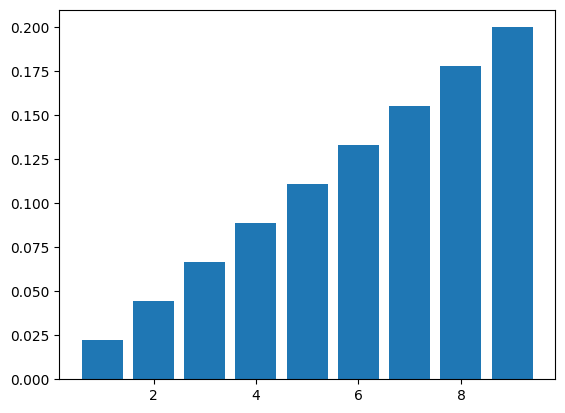

In [89]:
fig, ax = plt.subplots()
x = np.arange(1, 10)
ax.bar(x,one_flip_arr)
plt.show()

#### 5.3 After we observe the outcome of the first two flips in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

In [90]:

flips = data[:2]

all_flip_probability = calculate_total_head_probability(flips, coinprobabilities, one_flip_arr)

two_flip_arr = []
for i in range(9):
    two_flip_arr.append((one_flip_arr[i]*calculate_head_prob(flips, coinprobabilities[i]))/all_flip_probability)



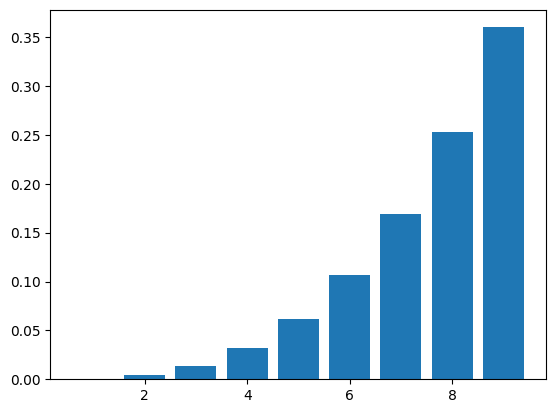

In [91]:
fig, ax = plt.subplots()
x = np.arange(1, 10)
ax.bar(x,two_flip_arr)
plt.show()

#### 5.4 Define a function called `compute_posterior()` to calculate the posterior probability of these 9 types of coin. The input parameters of the function include:

* A vector of prior probability of each coin.
* A vector of observed sequence of coin flips.
* A vector of head-up probability of each type of coin. (10 points)

In [92]:
def compute_posterior(prior, flips, coinprobabilities):
    all_flip_probability = calculate_total_head_probability(flips, coinprobabilities, prior)
    outarr = []
    for i in range(9):
        outarr.append((prior[i]*calculate_head_prob(flips, coinprobabilities[i]))/all_flip_probability)
    return outarr
    


#### 5.5 Use the function `compute_posterior()` to calculate the posterior probability after observing the first 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`. Print the posterior probability for each case. (10 points)

In [93]:
outcomes = [1,2,3,4,5,10,50,100,500,1000]
masterfliparr = [data[:i] for i in outcomes]
masterprobabilityarr = [[1/9 for i in range(9)]]

for i in range(len(masterfliparr)):
    masterprobabilityarr.append(compute_posterior(masterprobabilityarr[-1], masterfliparr[i], coinprobabilities))

print("Starting")
print(masterprobabilityarr[0])
for i in range(1, len(masterprobabilityarr)):
    print(f'{outcomes[i-1]} flips probabilities')
    print(masterprobabilityarr[i])

Starting
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
1 flips probabilities
[np.float64(0.022222222222222223), np.float64(0.044444444444444446), np.float64(0.06666666666666668), np.float64(0.08888888888888889), np.float64(0.1111111111111111), np.float64(0.13333333333333336), np.float64(0.15555555555555556), np.float64(0.17777777777777778), np.float64(0.19999999999999998)]
2 flips probabilities
[np.float64(0.0004938271604938273), np.float64(0.003950617283950618), np.float64(0.013333333333333338), np.float64(0.031604938271604946), np.float64(0.061728395061728385), np.float64(0.1066666666666667), np.float64(0.1693827160493827), np.float64(0.25283950617283957), np.float64(0.35999999999999993)]
3 flips probabilities
[np.float64(1.0220716370010379e-06), np.float64(6.541258476806642e-05), np.float64(0.0007450902233737567), np.float64(0.004186405425156251), np

#### 5.6 Create 10 separate bar plots that visualize the posterior probability of each type of coin, given 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`, respectively. What do you observe? (10 points)

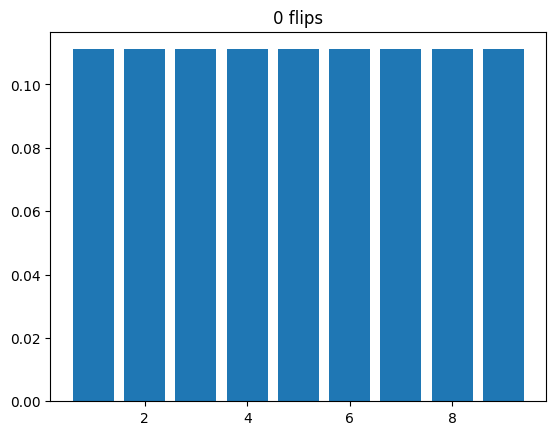

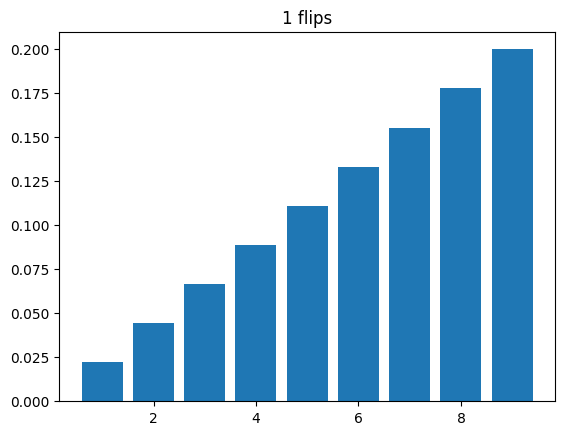

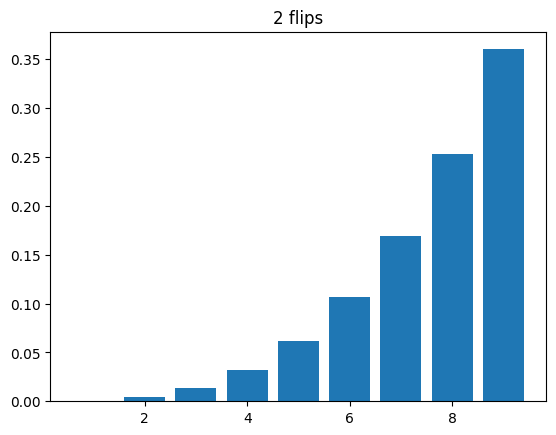

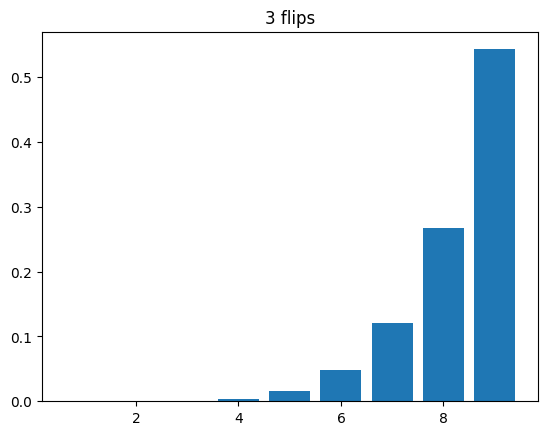

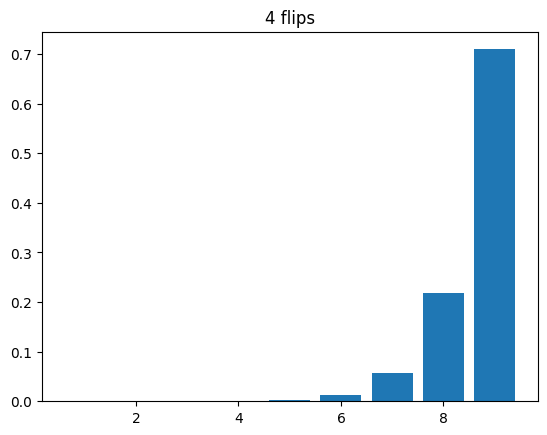

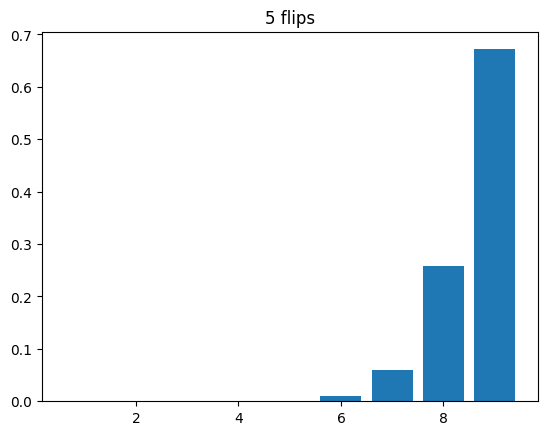

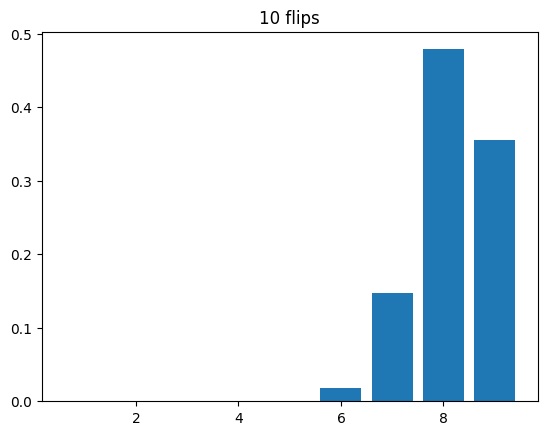

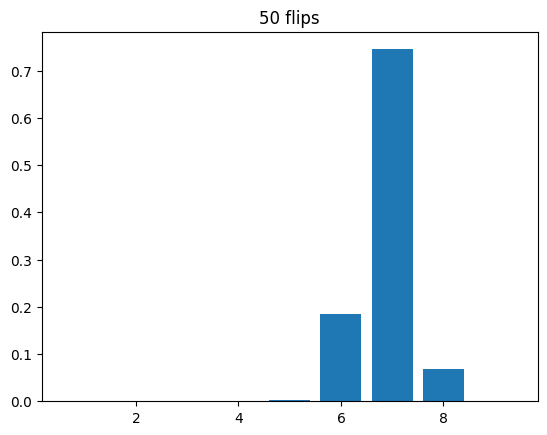

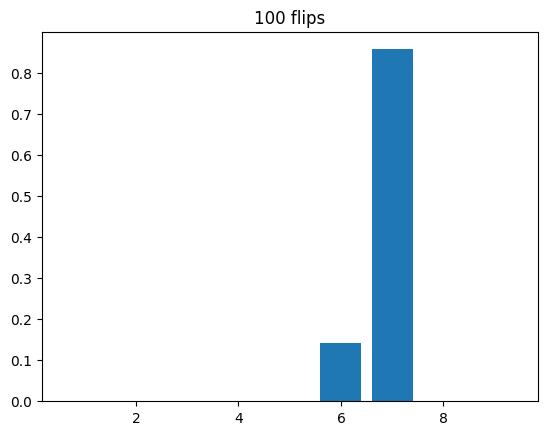

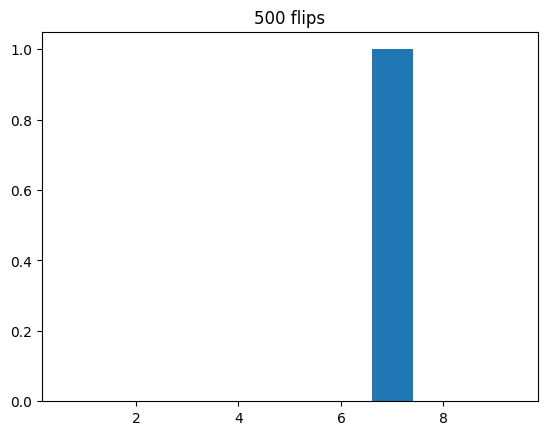

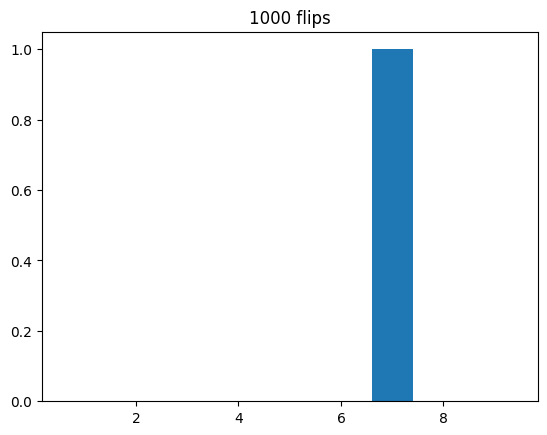

In [94]:
outcomes = [0] + outcomes
for i in range(len(masterprobabilityarr)):
    fig, ax = plt.subplots()
    x = np.arange(1, 10)
    ax.bar(x,masterprobabilityarr[i])
    plt.title(str(f'{outcomes[i]} flips'))
    plt.show()

## It seems as though with more flips, the probability it is one of the coins becomes higher than the other so we can safely assume it is that coin

### 5.7 Repeat 5.5 and 5.6 again using `data`, but now the prior probability for each type coin is `[0.05,0.6, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]`. In other words, initially, Type 2 coin has a much higher probability of being chosen. What do you observe?  (10 points)

In [95]:
outcomes = [1,2,3,4,5,10,50,100,500,1000]
masterfliparr = [data[:i] for i in outcomes]
masterprobabilityarr = [[1/9 for i in range(9)]]
newcoinprobabilities = [0.05,0.6, 0.05,0.05,0.05,0.05,0.05,0.05,0.05]

for i in range(len(masterfliparr)):
    masterprobabilityarr.append(compute_posterior(masterprobabilityarr[-1], masterfliparr[i], newcoinprobabilities))

print("Starting")
print(masterprobabilityarr[0])
for i in range(1, len(masterprobabilityarr)):
    print(f'{outcomes[i-1]} flips probabilities')
    print(masterprobabilityarr[i])

Starting
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
1 flips probabilities
[0.050000000000000024, 0.6000000000000002, 0.050000000000000024, 0.050000000000000024, 0.050000000000000024, 0.050000000000000024, 0.050000000000000024, 0.050000000000000024, 0.050000000000000024]
2 flips probabilities
[0.0005760368663594475, 0.9953917050691249, 0.0005760368663594475, 0.0005760368663594475, 0.0005760368663594475, 0.0005760368663594475, 0.0005760368663594475, 0.0005760368663594475, 0.0005760368663594475]
3 flips probabilities
[3.3489707942954984e-07, 0.9999973208233642, 3.3489707942954984e-07, 3.3489707942954984e-07, 3.3489707942954984e-07, 3.3489707942954984e-07, 3.3489707942954984e-07, 3.3489707942954984e-07, 3.3489707942954984e-07]
4 flips probabilities
[1.615055828689787e-11, 0.9999999998707957, 1.615055828689787e-11, 1.615055828689787e-11, 1.615055828689787

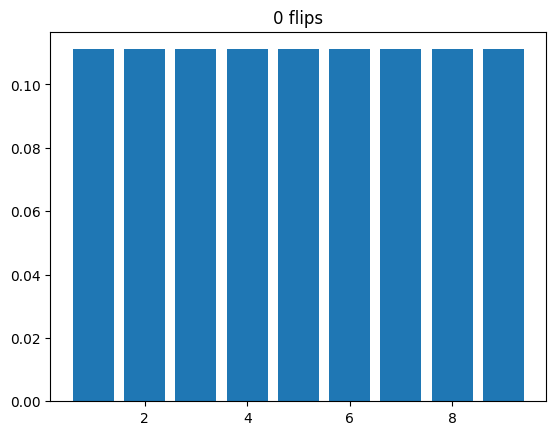

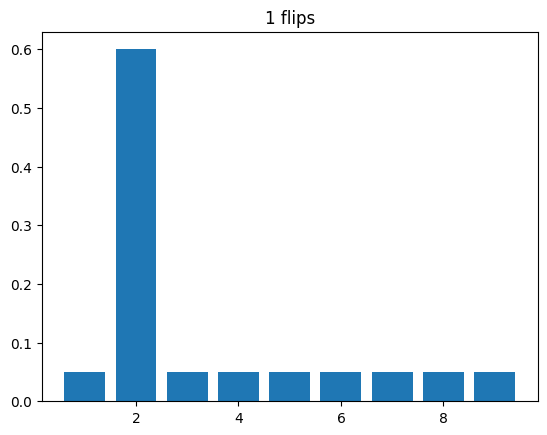

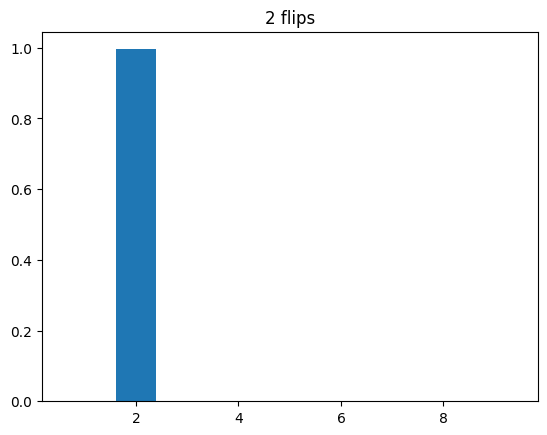

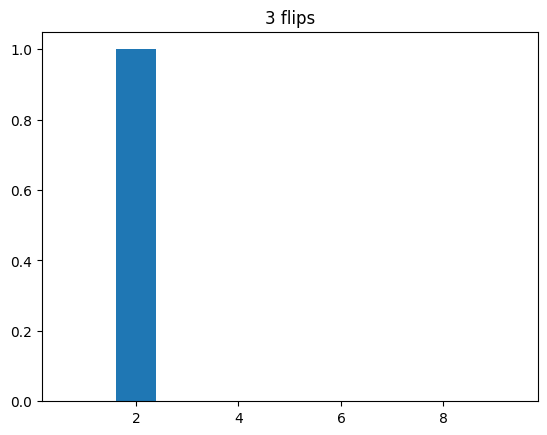

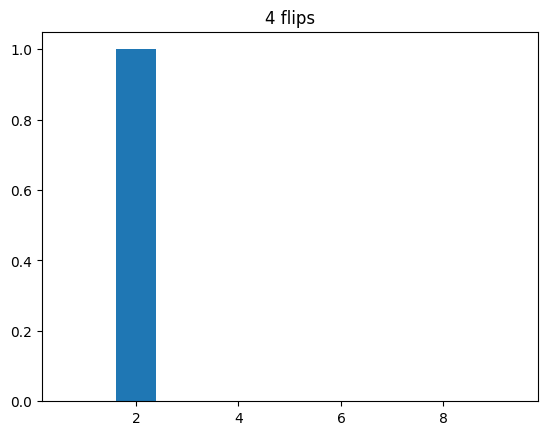

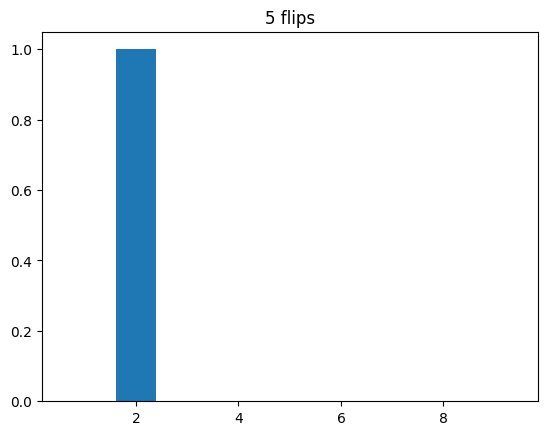

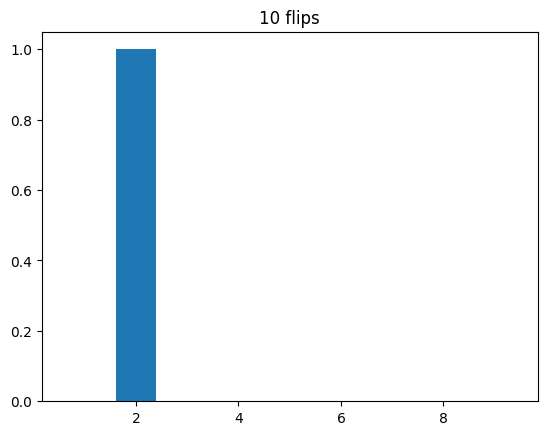

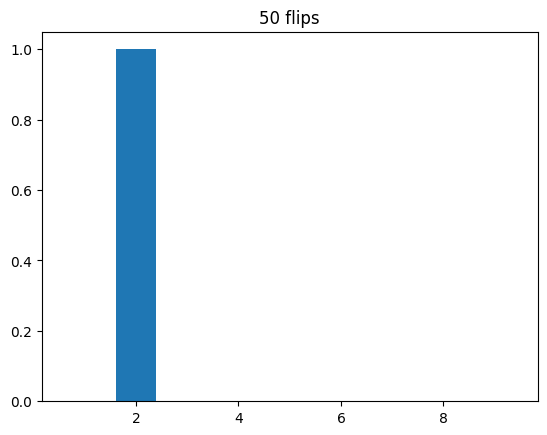

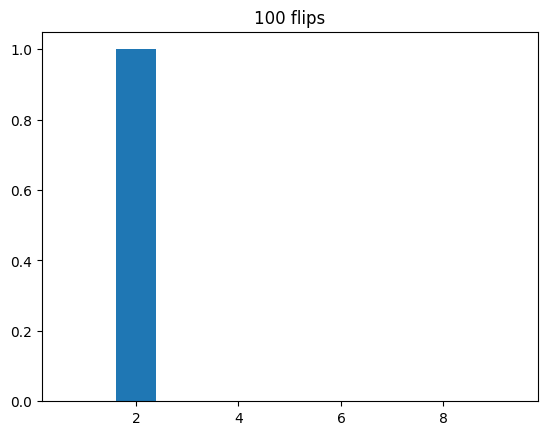

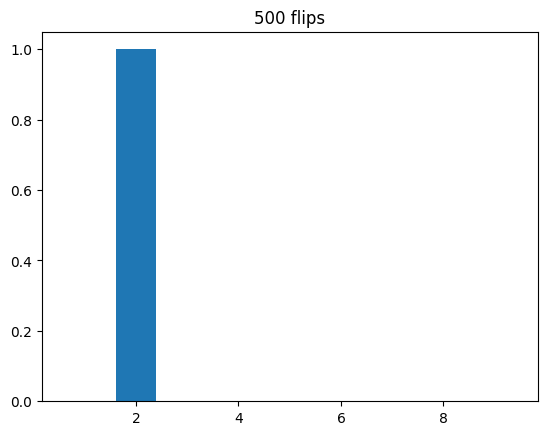

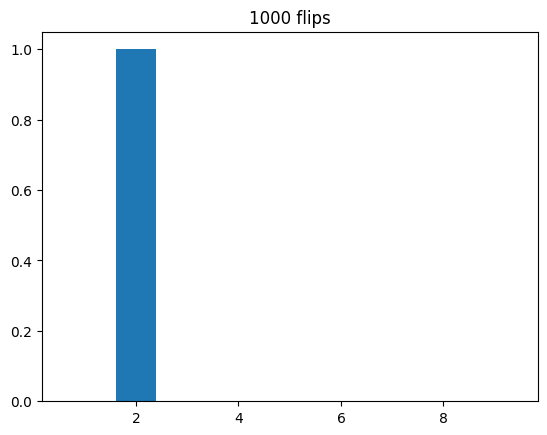

In [96]:
outcomes = [0] + outcomes
for i in range(len(masterprobabilityarr)):
    fig, ax = plt.subplots()
    x = np.arange(1, 10)
    ax.bar(x,masterprobabilityarr[i])
    plt.title(str(f'{outcomes[i]} flips'))
    plt.show()

## The graphs quickly converge of having high confidence that coin number 2 is the coin chosen